Implementation of Logistic Regression : -

1. Collecting Data
2. Analyzing Data
3. Data Wrangling
4. Train & Test
5. Accuracy Check

## Collecting Data


In [2]:
#Collecting Data

import pandas as pd 
# used for data analysis
import numpy as np 
# this library is used for scientific computation
import seaborn as sns 
# used for statistical plotting
import matplotlib.pyplot as plt
# used for plottin
%matplotlib inline 
# to run this library in jupiter notebook
import math

dataset_SUV = pd.read_csv("suv_data.csv")
dataset_SUV.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
print("No. of userID in original data:" + str(len(dataset_SUV.index)))

No. of userID in original data:400


## Analyzing Data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

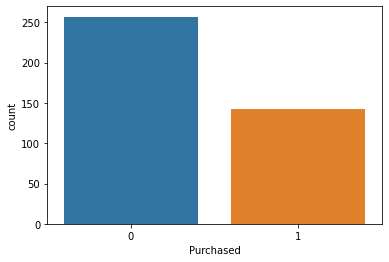

In [4]:
#How many people actually purachsed
sns.countplot(x="Purchased", data=dataset_SUV)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

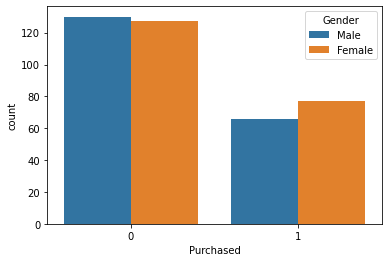

In [5]:
#How many male and female purchased SUV

sns.countplot(x="Purchased", hue="Gender", data=dataset_SUV)

<AxesSubplot:xlabel='Age', ylabel='count'>

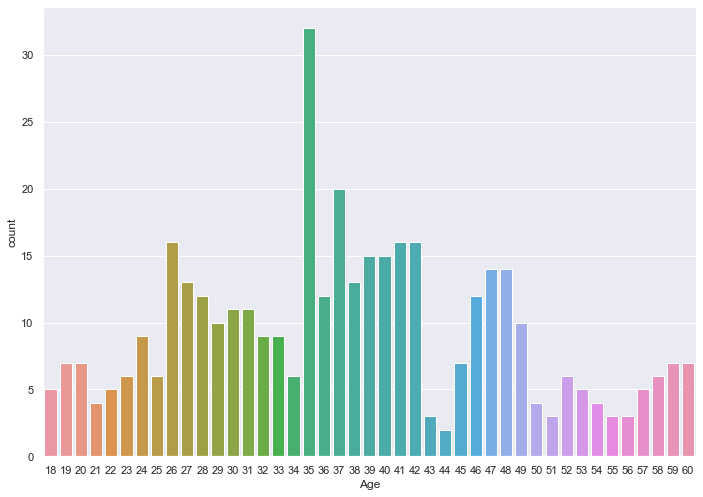

In [6]:
#At what age most people tend to buy SUV

# size of countplot
sns.set(rc={'figure.figsize':(11.7,8.27)})

# countplot
sns.countplot(x="Age", data=dataset_SUV)

<AxesSubplot:ylabel='Frequency'>

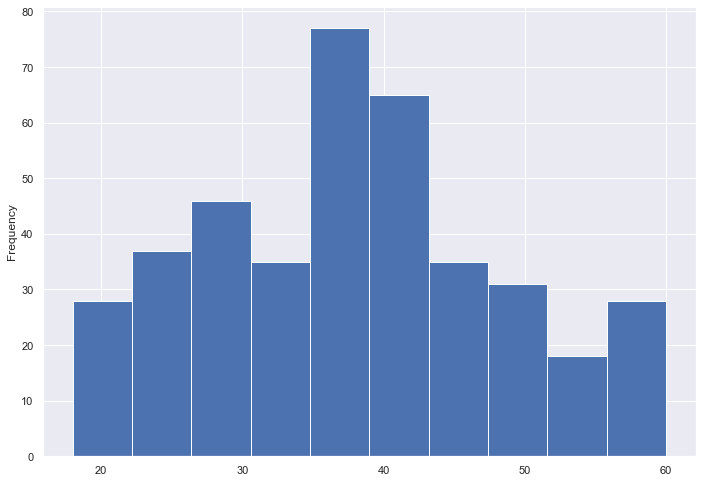

In [7]:
#At what age most people tend to buy SUV (histogram)

dataset_SUV["Age"].plot.hist()

In [8]:
dataset_SUV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Data Wrangling

In [9]:
# this will basically tell us what all values are null
dataset_SUV.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [10]:
dataset_SUV.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Non of the coloumn has any null value

<AxesSubplot:>

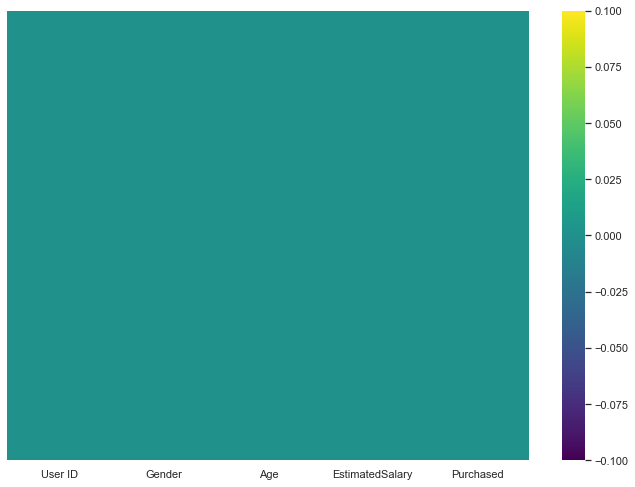

In [11]:
# We'll analysis missing values with help of heat map

sns.heatmap(dataset_SUV.isnull(), yticklabels=False, cmap="viridis")

# Train & Test Data

In [12]:
# Here we'll split the data into train subset and test subset.
# then we'll build a model on train data and predict the ouput on test data set

# Dependent variable (we have the discrete outcome)
X = dataset_SUV.iloc[:,[2,3]].values
# Independent variable (value data we need to predict)
y = dataset_SUV.iloc[:,4].values

In [13]:
# Now for splittibg data into testing and training subset we'll be using sklearn

from sklearn.model_selection import train_test_split

In [14]:
# type `train_test_split` and press shift+tab and you will able to see example of how train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# import Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [17]:
predictions = classifier.predict(X_test)

# Accuracy Check

In [18]:
# Now we'll evaluate how our model has been performing
# we can calculate the accuraccy or we can calculate the classification report

from sklearn.metrics import classification_report

classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.89      0.96      0.92        68\n           1       0.89      0.75      0.81        32\n\n    accuracy                           0.89       100\n   macro avg       0.89      0.85      0.87       100\nweighted avg       0.89      0.89      0.89       100\n'

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)*100

89.0

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[65,  3],
       [ 8, 24]], dtype=int64)

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

This is a list of rates that are often computed from a confusion matrix for a binary classifier:

# Accuracy: Overall, how often is the classifier correct?
# (TP+TN)/total = (65+24)/100 = 0.89

Misclassification Rate: Overall, how often is it wrong? (FP+FN)/total equivalent to 1 minus Accuracy also known as "Error Rate"

True Positive Rate: When it's actually yes, how often does it predict yes? TP/actual yes also known as "Sensitivity" or "Recall"

False Positive Rate: When it's actually no, how often does it predict yes? FP/actual no

True Negative Rate: When it's actually no, how often does it predict no? TN/actual no equivalent to 1 minus False Positive Rate also known as "Specificity"

Precision: When it predicts yes, how often is it correct? TP/predicted yes

Prevalence: How often does the yes condition actually occur in our sample? actual yes/total